In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sst
import time
import re
import os
from os.path import basename
import glob2
from datetime import date, datetime, timedelta
import plotly.express as px
from google.colab import auth, files

import warnings
warnings.filterwarnings('ignore')

from statistics import mode
from itertools import combinations
from scipy.stats import ttest_ind, pearsonr, f_oneway

from datetime import datetime, timedelta, time

from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler, RobustScaler, MinMaxScaler, Normalizer                              
from sklearn.feature_selection import f_classif, mutual_info_classif

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 1000) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [157]:
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving all_eda_obr20_04.csv to all_eda_obr20_04 (1).csv
User uploaded file "all_eda_obr20_04.csv" with length 25664356 bytes


In [158]:
df = pd.read_csv('all_eda_obr20_04 (1).csv')

In [159]:
feat_dict = {
    'FHKLD_3': 'QHKLD', 
    'FSPPA_3': 'QSPPA', 
    'FDEPT_3': 'QDEPT', 
    'FBPOS_3': 'QBPOS', 
    'FRPM_3': 'QRPM', 
    'FBVEL_3': 'QBVEL',
    'FSTOR_3': 'QSTOR'
}

In [160]:
df.hole.value_counts()

204       2976
278       2939
220ST4    2361
243       1737
234ST2    1681
210ST2    1365
220ST3    1235
256ST3    1196
220       1040
256ST2     905
217ST2     808
241        805
279        791
210ST      739
216        610
217ST1     378
Name: hole, dtype: int64

In [169]:
df2 = pd.DataFrame()
for hole in df.hole.unique():
    df1 = df.loc[(df['hole']==hole) & (df['RIG_STATE']==7)]
    for key, val in feat_dict.items():
        df1[val] = 0
        df1.loc[(df1[key] >= df1[key].quantile(0.97)), val] = 1
        df1.loc[(df1[key] <= df1[key].quantile(0.03)), val] = 1
    df2 = pd.concat([df2, df1], ignore_index=True)

In [170]:
df2.QSPPA.value_counts()

0    9757
1     912
Name: QSPPA, dtype: int64

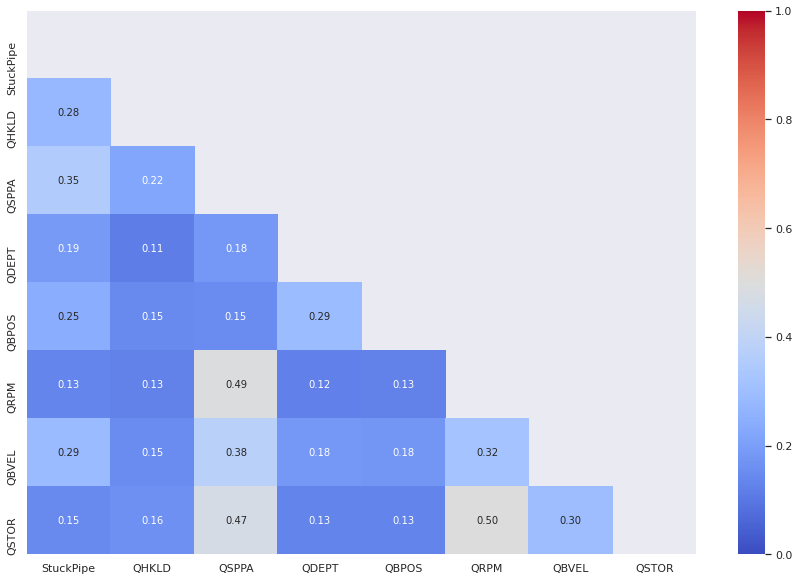

In [171]:
cols = ['StuckPipe', 'QHKLD', 'QSPPA', 'QDEPT', 'QBPOS', 'QRPM', 'QBVEL', 'QSTOR']
plt.figure(figsize=(15, 10))
mask = np.triu(df2[cols].corr())
sns.heatmap(df2[cols].corr().abs(), vmin=0, vmax=1, annot=True,
            fmt='.2f', cmap='coolwarm', mask=mask)